# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

# Data Fetching

In [2]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('../../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16],low_memory=False)
    out= pd.read_csv('../../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19],low_memory=False)
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


# A fast algorithm for Independent Component Analysis Decomposition

In [3]:
from sklearn.decomposition import SparsePCA
import warnings
scaler_obj1=SparsePCA()
scaler_obj2=SparsePCA()
X1=scaler_obj1.fit_transform(A1)
Y1=scaler_obj2.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Model

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)


model6 =MultiOutputRegressor(KNeighborsRegressor(n_neighbors=7,weights='uniform',algorithm='auto',leaf_size=50,p=2))
model_fit6=model6.fit(x_train, y_train)

print('Model Training done!!')

# Dumping Model into a file

filename6 = 'knn.sav'
pickle.dump(model_fit6, open(filename6, 'wb'))

Model Training done!!


# Error Analysis

In [5]:
from sklearn import metrics
from sklearn.metrics import r2_score
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

y_test_pred6=model_fit6.predict(x_test)
y_train_pred6=model_fit6.predict(x_train)

#finding out the r2 score
r2_test6=r2_score(y_test,y_test_pred6,multioutput='variance_weighted')
r2_train6=r2_score(y_train,y_train_pred6,multioutput='variance_weighted')

print('r2 score on train data '+ str(r2_train6))
print('r2 score on test data '+ str(r2_test6))

knn_mae=metrics.mean_absolute_error(y_test, y_test_pred6)
knn_mse=metrics.mean_squared_error(y_test, y_test_pred6)
knn_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred6))
print('Mean Absolute Error:',knn_mae)
print('Mean Squared Error:',knn_mse )
print('Root Mean Squared Error:',knn_rmse)

r2 score on train data 0.12395325497170234
r2 score on test data -260.26748284426947
Mean Absolute Error: 69.02419
Mean Squared Error: 366586180.0
Root Mean Squared Error: 19146.44


In [6]:
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)
loaded_model_fit7 = pickle.load(open("knn.sav", 'rb'))
y_test_pred=loaded_model_fit7.predict(x_test)
print("Predicted :\n",y_test_pred)
r2_test=r2_score(y_test,y_test_pred,multioutput='variance_weighted')
print("R2 Score : ",r2_test)

Predicted :
 [[-6.2837986e+01  2.0725721e+01  1.2692659e+01 ... -3.2773319e+01
  -3.7808403e-01 -4.0582159e-01]
 [-4.6411255e+01 -3.6272881e+01  1.1596568e+02 ...  3.3671642e+01
   1.4230025e+00  2.1465161e+00]
 [-6.3428120e+01 -1.5539513e+00 -1.7245607e+02 ...  3.2764900e+00
   1.7171313e+00 -8.0436718e-01]
 ...
 [-8.8478584e+01 -4.9365726e+00 -1.9410374e+01 ...  1.1562057e+01
  -1.1298646e+00  3.4371021e-01]
 [-4.5151154e+01  3.4661785e+01  2.6516583e+02 ... -1.8344946e+01
  -1.3890942e+00  2.9137427e-01]
 [-9.2312004e+01 -3.3428005e+01  2.7805313e+02 ... -1.4819923e+01
   1.1437632e+00 -2.5448209e-01]]
R2 Score :  -260.26748284426947


In [8]:
x_test=scaler_obj1.inverse_transform(x_test)
y_test_pred=scaler_obj2.inverse_transform(y_test_pred)
y_test=scaler_obj2.inverse_transform(y_test)
pd.DataFrame(y_test_pred)

,0,1,2,3,4,5,6
0,82.285714,26.000000,-82.285714,787.142848,3.995714,4.714286,5.464286
1,5.857142,37.428571,3.285714,348.285714,6.655714,7.391429,7.808572
2,49.142857,47.000000,-36.000000,-58.000026,23.925714,27.697143,30.055714
3,78.857143,8.000000,-13.000000,1578.428541,36.454285,41.428572,44.849999
4,1.285714,48.000000,-1.857143,-174.000031,5.854286,6.990000,8.252857
...,...,...,...,...,...,...,...
432566,-0.428571,98.714286,63.142857,23.571429,7.090000,8.101429,8.628571
432567,78.000000,44.000000,-82.428571,399.714286,2.060000,2.482857,3.182858
432568,21.000000,18.000000,-48.714286,-44.714294,40.428571,47.030000,49.545713
432569,71.285714,37.000000,-86.285714,665.571429,9.247143,9.934286,10.460000


In [9]:
import datetime
from datetime import datetime
temp_arr=x_test[0:,1]
dates=list()
for i in range(0,len(temp_arr)):
    datetime_str=str(int(temp_arr[i]))
    datetime_str=datetime_str[0:6]
    if(datetime_str[4:6]=="00"):
        datetime_str=datetime_str[0:4]+'1'
    datetime_obj = datetime.strptime(datetime_str,"%y%m%d")
    dates.append(str(datetime_obj.date()))

In [10]:
import pandas as pd
df1=pd.DataFrame(y_test,index=dates,columns=['NO2','O3','NO','CO','PM1','PM2.5','PM10'])
df1.index.name="DATE"
print("Actual Values:")
df1

Actual Values:


,NO2,O3,NO,CO,PM1,PM2.5,PM10
DATE,,,,,,,
2019-06-04,82.0,36.0,-79.0,706.000000,2.000000,2.420000,2.820000
2019-09-26,19.0,50.0,-8.0,478.000000,10.170000,10.950000,12.670000
2019-05-13,58.0,38.0,-34.0,-107.000031,27.400000,31.750000,41.180000
2019-04-17,83.0,5.0,-27.0,1579.999969,39.410000,45.180000,50.160000
2019-08-30,5.0,54.0,-4.0,-170.000031,6.900000,8.250000,9.110000
...,...,...,...,...,...,...,...
2019-03-29,-3.0,104.0,64.0,29.000000,7.130000,7.980000,8.190000
2019-06-30,77.0,40.0,-81.0,413.000000,1.940001,2.610001,4.120001
2019-10-01,21.0,3.0,-48.0,-3.000000,52.910002,61.519999,67.230001


In [11]:
arr=["Y_Actual"]*25
temp_df1=df1.head(25)
temp_df1['Data']=arr
temp_df1.to_excel("knn_y_test.xlsx")
temp_df1

C:\Users\utkar\AppData\Local\Temp/ipykernel_16552/1619810651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df1['Data']=arr


,NO2,O3,NO,CO,PM1,PM2.5,PM10,Data
DATE,,,,,,,,
2019-06-04,82.0,36.0,-79.0,706.000000,2.000000,2.420000,2.820000,Y_Actual
2019-09-26,19.0,50.0,-8.0,478.000000,10.170000,10.950000,12.670000,Y_Actual
2019-05-13,58.0,38.0,-34.0,-107.000031,27.400000,31.750000,41.180000,Y_Actual
2019-04-17,83.0,5.0,-27.0,1579.999969,39.410000,45.180000,50.160000,Y_Actual
2019-08-30,5.0,54.0,-4.0,-170.000031,6.900000,8.250000,9.110000,Y_Actual
2019-06-29,10.0,34.0,35.0,52.000000,6.889999,8.320000,10.110000,Y_Actual
2019-07-27,24.0,6.0,-38.0,-69.000000,18.180000,22.040001,23.080000,Y_Actual
2019-07-08,72.0,12.0,-93.0,649.000000,3.120000,4.330000,6.960001,Y_Actual
2019-09-07,52.0,66.0,-73.0,244.000000,20.639999,23.180000,23.709999,Y_Actual


In [12]:
import pandas as pd
df2=pd.DataFrame(y_test_pred,index=dates,columns=['NO2','O3','NO','CO','PM1','PM2.5','PM10'])
df2.index.name="DATE"
print("Predicted Values:")
df2

Predicted Values:


,NO2,O3,NO,CO,PM1,PM2.5,PM10
DATE,,,,,,,
2019-06-04,82.285714,26.000000,-82.285714,787.142848,3.995714,4.714286,5.464286
2019-09-26,5.857142,37.428571,3.285714,348.285714,6.655714,7.391429,7.808572
2019-05-13,49.142857,47.000000,-36.000000,-58.000026,23.925714,27.697143,30.055714
2019-04-17,78.857143,8.000000,-13.000000,1578.428541,36.454285,41.428572,44.849999
2019-08-30,1.285714,48.000000,-1.857143,-174.000031,5.854286,6.990000,8.252857
...,...,...,...,...,...,...,...
2019-03-29,-0.428571,98.714286,63.142857,23.571429,7.090000,8.101429,8.628571
2019-06-30,78.000000,44.000000,-82.428571,399.714286,2.060000,2.482857,3.182858
2019-10-01,21.000000,18.000000,-48.714286,-44.714294,40.428571,47.030000,49.545713


In [13]:
arr=["Y_Predicted"]*25
temp_df2=df2.head(25)
temp_df2['Data']=arr
temp_df2.to_excel("knn_y_test_pred.xlsx")
temp_df2

C:\Users\utkar\AppData\Local\Temp/ipykernel_16552/2452171575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df2['Data']=arr


,NO2,O3,NO,CO,PM1,PM2.5,PM10,Data
DATE,,,,,,,,
2019-06-04,82.285714,26.000000,-82.285714,787.142848,3.995714,4.714286,5.464286,Y_Predicted
2019-09-26,5.857142,37.428571,3.285714,348.285714,6.655714,7.391429,7.808572,Y_Predicted
2019-05-13,49.142857,47.000000,-36.000000,-58.000026,23.925714,27.697143,30.055714,Y_Predicted
2019-04-17,78.857143,8.000000,-13.000000,1578.428541,36.454285,41.428572,44.849999,Y_Predicted
2019-08-30,1.285714,48.000000,-1.857143,-174.000031,5.854286,6.990000,8.252857,Y_Predicted
2019-06-29,35.571429,40.285714,20.714286,92.285710,10.507143,12.504286,14.424286,Y_Predicted
2019-07-27,22.000000,10.285714,-38.142857,-94.571442,13.888571,16.448571,18.350000,Y_Predicted
2019-07-08,72.571429,12.428571,-94.714286,634.000000,3.232857,4.115714,4.477143,Y_Predicted
2019-09-07,49.714286,30.285714,-64.142857,347.571429,10.762857,12.242857,13.604286,Y_Predicted


# y-test vs y-predict

Y_Test: [[ 82.          36.         -79.         ...   2.           2.42000008
    2.81999969]
 [ 19.          50.          -8.         ...  10.17000008  10.94999981
   12.67000008]
 [ 58.          38.         -34.         ...  27.39999962  31.75
   41.18000031]
 ...
 [ 21.           3.         -48.         ...  52.91000175  61.51999855
   67.23000145]
 [ 71.          40.         -87.         ...   7.60000038   8.02000046
    8.02000046]
 [ -9.          -5.         -16.         ...   3.5          4.21999931
    4.38999939]]
Y_Test_Predict: [[-2.33171072e-05  1.39992684e-05 -1.33655303e-05 ... -1.44096941e-04
  -4.43282758e-04 -2.02617751e-06]
 [ 5.25395204e-05  1.12236231e-06 -9.06450557e-05 ... -1.73367283e-04
  -3.45301352e-04  3.73715626e-06]
 [ 7.59850102e-05 -6.35957858e-06 -6.24781375e-05 ... -5.70410541e-06
   2.01575535e-04  3.14377307e-06]
 ...
 [ 7.54976505e-05 -4.11244868e-06 -5.72370664e-05 ... -1.65112915e-05
   7.30109630e-04  3.45199351e-06]
 [ 8.70889519e-05  2.70331500

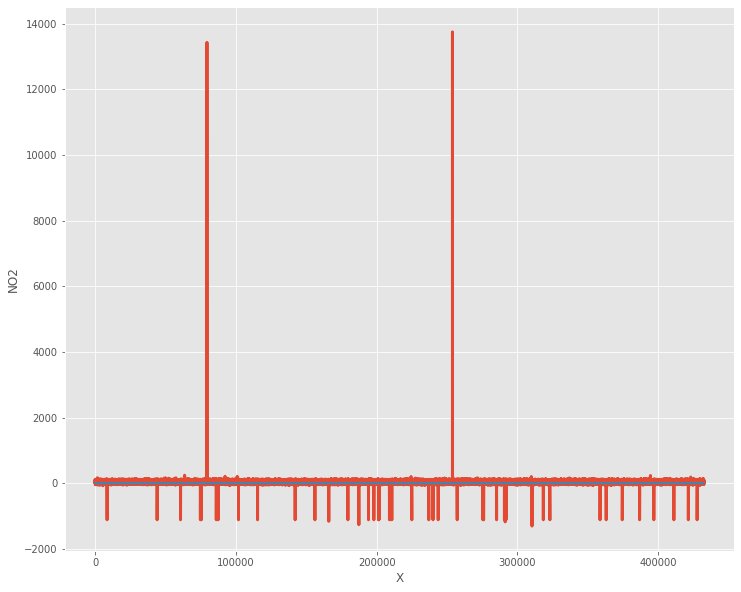

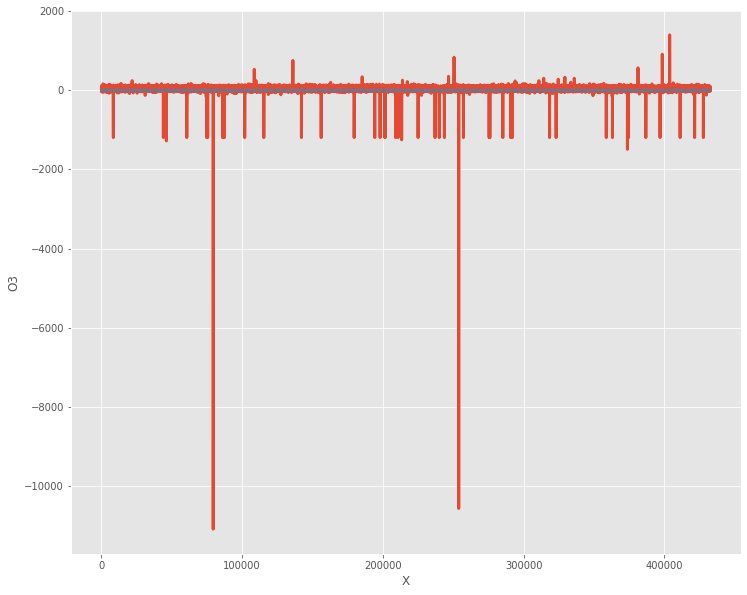

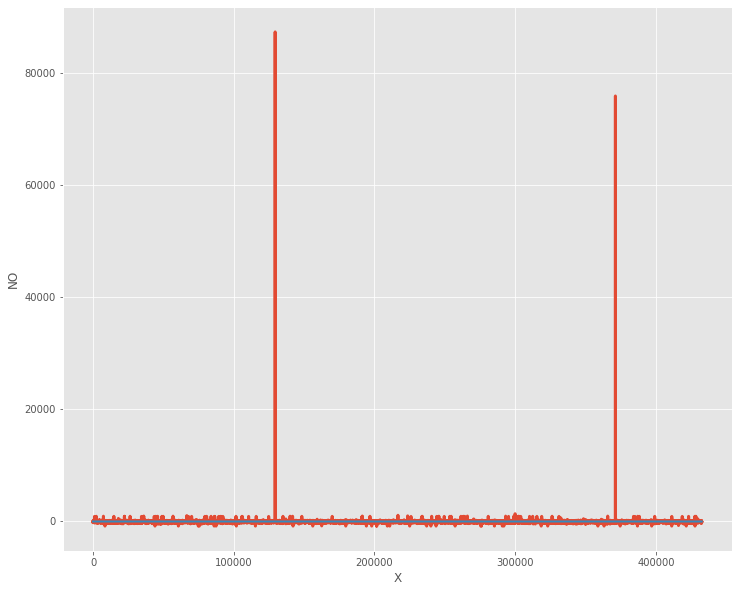

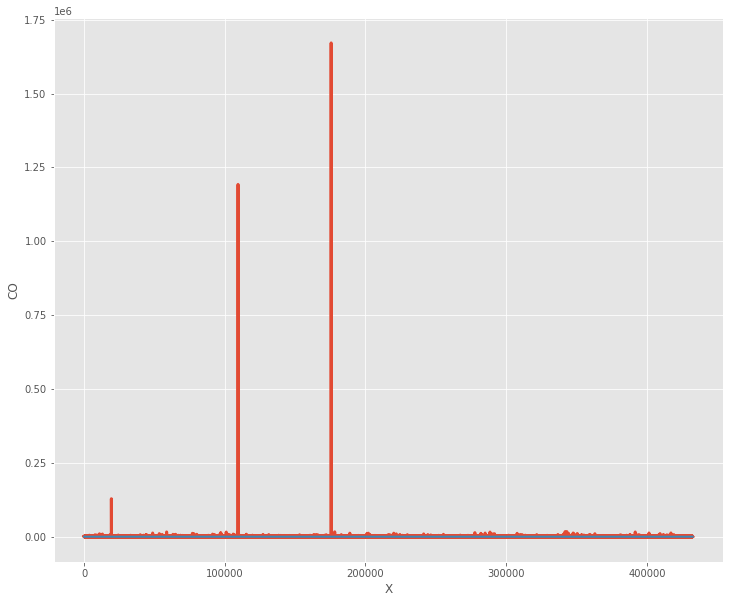

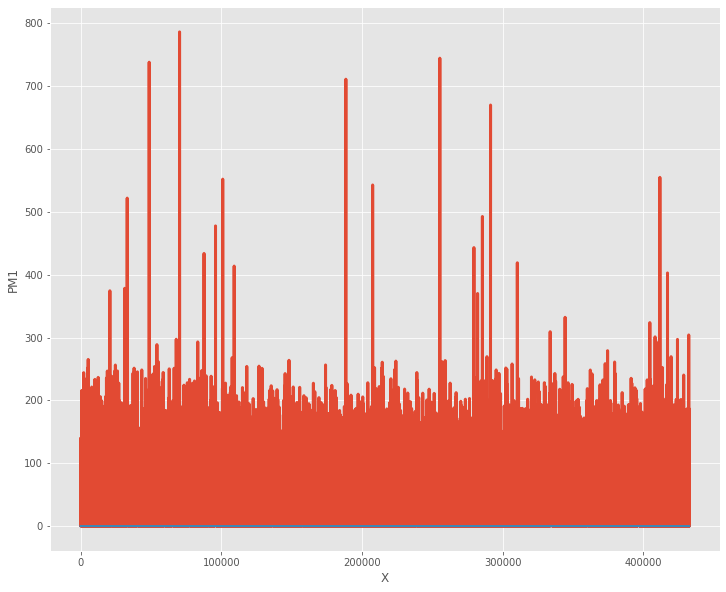

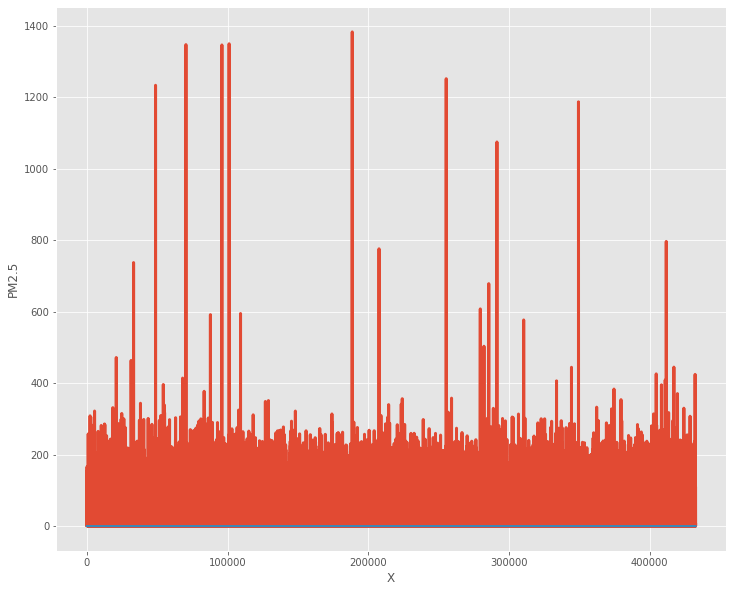

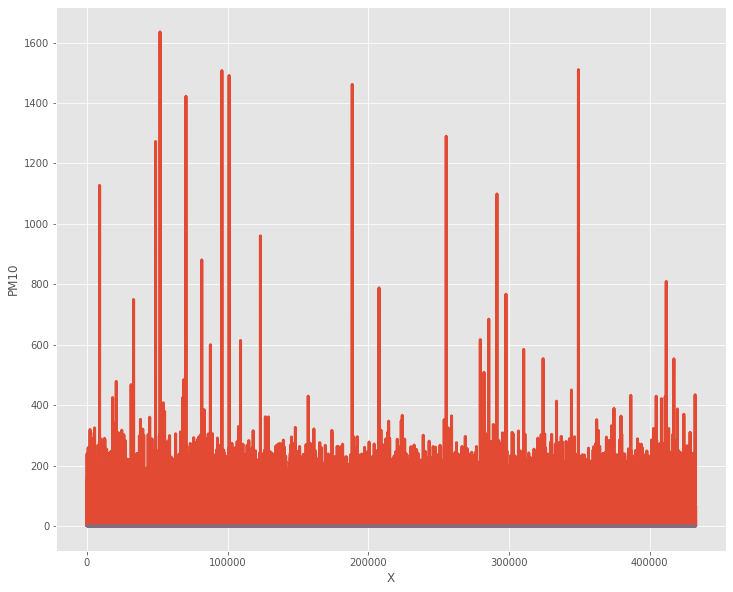

In [14]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred6)

from matplotlib import style
style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred6[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()

In [ ]:
#completed